# Different Label encoding techniques


## Preparation

Use dataset that is provided in the eLearning

In [169]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [170]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [171]:
org_train = pd.read_csv('SBA_loans_train.csv') # original training data set
org_test  = pd.read_csv('SBA_loans_test.csv') #original testing data set
orig_columns = list(X_train.columns)

In [172]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']


In [173]:
print("Train shape:", org_train.shape)
print("Test shape:", org_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [174]:
desc_df = describe_more(org_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [8]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [8]:
org_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [175]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [176]:
#These are the columns with missing values in both train and test data set
for col in org_train.columns:
    if org_train[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [177]:
cols=org_train.columns
cols

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'Defaulted'],
      dtype='object')

In [179]:
missing_col_cat=['City','State','Bank','BankState','RevLineCr','LowDoc']
missing_col_numerical=['NewExist']
for col in missing_col_cat:
    org_train[col] = org_train[col].fillna("Missing")
for col in missing_col_cat:
    org_test[col] = org_test[col].fillna("Missing")
for col in missing_col_numerical:
    org_train[col] = org_train[col].fillna(0)
for col in missing_col_numerical:
    org_test[col] = org_test[col].fillna(0)

In [180]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112396 entries, 0 to 112395
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               112396 non-null  object 
 1   State              112396 non-null  object 
 2   Zip                112396 non-null  int64  
 3   Bank               112396 non-null  object 
 4   BankState          112396 non-null  object 
 5   NAICS              112396 non-null  int64  
 6   Term               112396 non-null  int64  
 7   NoEmp              112396 non-null  int64  
 8   NewExist           112396 non-null  float64
 9   CreateJob          112396 non-null  int64  
 10  RetainedJob        112396 non-null  int64  
 11  FranchiseCode      112396 non-null  int64  
 12  UrbanRural         112396 non-null  int64  
 13  RevLineCr          112396 non-null  object 
 14  LowDoc             112396 non-null  object 
 15  DisbursementGross  112396 non-null  float64
 16  Ba

In this section you are asked to encode categorical variables.   
Because we are going to use Decision Tree approach in the Lab, we will not use One-Hot encoding. Instead, you will utilize  Label encoding, Target encoding and Weight of Evidence encoding.  

For Target encoding and WOE, use `category_encoders` library.
  
Your goal is to determine which approach works better with the given dataset.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use the three types of categorical variables encoders:  
- Use LabelEncoder from `sklearn.preprocessing` 
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html 
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html 

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on the combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new column names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

You should save fitted encoders (Label, TE and WOE) in the Python dictionary named `cat_encoders`.
The key in the `cat_encoders` will be Python set with (column-name, encoder-type). For example, `("City","le")`
Saved encoders will be handy when you try to score trained model on unseen data that has to be transformed before scoring.

In [120]:
cols=['City','State','Bank','BankState','RevLineCr','LowDoc'] #columns to be encoded

In [190]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
frames=[org_train,org_test]
org_full=pd.concat(frames) #Combing the test and Train dataset before label encoding
for col in cols:
    X_full[col]= label_encoder.fit_transform(org_full[col]) # Encoding labels in all 6 columns
X_full

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,10027,1,10411,803,11,1142,73,1,2,2,1,0,1,9,4,9116,0,653,1320,1
1,19482,3,24209,4997,5,0,84,3,2,0,0,0,0,9,4,22016,0,1748,3739,1
2,1058,21,1241,381,23,293,84,9,1,0,0,1,1,2,7,48147,0,4723,9758,0
3,740,3,24249,3292,4,1210,27,20,1,0,20,265,2,13,4,52165,0,3527,4043,1
4,8869,18,19889,708,20,0,60,1,1,0,0,1,1,2,7,20976,0,1662,3066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,9688,50,7049,5008,54,0,60,6,1,0,0,1,0,9,7,8243,0,643,1201,0
112392,82,37,21084,4937,39,1211,78,2,1,10,0,1,2,2,4,43021,0,4028,4945,1
112393,11130,4,25039,668,5,1159,78,1,2,0,0,0,1,9,4,6655,0,469,960,1
112394,12013,4,24873,857,49,229,84,3,1,4,3,0,1,9,4,9116,0,653,609,0


In [182]:
#Target Encoding
cols=['City','State','Bank','BankState','RevLineCr','LowDoc'] #columns to be encoded
from category_encoders import TargetEncoder
train_TE=org_train.copy()
enc = TargetEncoder()
for col in cols:
    train_TE[col] = train_TE[col].astype('object')
    train_TE[col] = enc.fit_transform(train_TE[col], train_TE['Defaulted'])
train_TE #Target encoded training data set

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,0.283212,0.167744,35811,0.308181,0.158105,621310,73,1,2.0,2,1,0,1,0.146342,0.186457,25000.0,0.0,25000.0,21250.0,1
1,0.191919,0.200634,85254,0.138341,0.221678,0,84,3,2.0,0,0,0,0,0.146342,0.186457,52000.0,0.0,52000.0,46800.0,1
2,0.125985,0.096586,4401,0.062502,0.076696,323110,84,9,1.0,0,0,1,1,0.149252,0.090740,150000.0,0.0,150000.0,127500.0,0
3,0.351182,0.200634,85323,0.059406,0.068197,722110,27,20,1.0,0,20,10625,2,0.253136,0.186457,186959.0,0.0,100000.0,50000.0,1
4,0.275805,0.179574,70403,0.362410,0.101741,0,60,1,1.0,0,0,1,1,0.149252,0.090740,50000.0,0.0,50000.0,40000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,0.135514,0.115061,55901,0.000000,0.075003,722410,240,8,1.0,4,8,1,2,0.149252,0.186457,388000.0,0.0,388000.0,388000.0,0
337182,0.312500,0.198531,10301,0.274257,0.292392,445110,36,4,2.0,0,4,0,1,0.253136,0.186457,31500.0,0.0,31500.0,15750.0,0
337183,0.150340,0.143651,18936,0.110039,0.091828,311811,120,2,2.0,15,0,25650,1,0.146342,0.186457,720000.0,0.0,720000.0,540000.0,0
337184,0.211049,0.149706,83835,0.186969,0.101227,441229,84,2,1.0,1,1,1,1,0.253136,0.186457,210282.0,0.0,110000.0,55000.0,0


In [185]:
#Target Encoding - Transforming the test data
cols=['City','State','Bank','BankState','RevLineCr','LowDoc']
test_TE=org_test.copy()
train=org_train.copy()
enc = TargetEncoder()
for col in cols:
    enc.fit(train[col], train['Defaulted'])
    test_TE[col] = enc.transform(test_TE[col])
test_TE #Target encoded t data set

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,0.146713,0.224163,61866,7.359307e-02,0.222704,0,84,1,2.0,0,0,1,0,0.146342,0.090740,42000.0,0.0,42000.0,33600.0,0
1,0.128531,0.149706,83704,1.383407e-01,0.175423,0,84,7,1.0,0,0,1,0,0.146342,0.186457,15000.0,0.0,15000.0,13500.0,0
2,0.170526,0.224163,60188,6.630936e-13,0.222704,0,240,19,1.0,15,0,1,0,0.146342,0.186457,497000.0,0.0,497000.0,497000.0,0
3,0.071290,0.106169,3878,2.131563e-01,0.059538,235610,84,21,1.0,0,21,1,1,0.253136,0.186457,20000.0,0.0,20000.0,10000.0,0
4,0.152901,0.202302,8002,2.131563e-01,0.195855,541511,84,2,2.0,1,3,1,1,0.146342,0.186457,100000.0,0.0,100000.0,50000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,0.244749,0.173534,25526,1.755319e-01,0.156785,0,60,6,1.0,0,0,1,0,0.146342,0.090740,23269.0,0.0,24700.0,19760.0,0
112392,0.180399,0.151976,74820,1.419739e-01,0.111435,722211,78,2,1.0,10,0,1,2,0.149252,0.186457,120000.0,0.0,120000.0,60000.0,1
112393,0.256544,0.183761,90638,5.554282e-01,0.221678,621999,78,1,2.0,0,0,0,1,0.146342,0.186457,20000.0,0.0,20000.0,17000.0,1
112394,0.272090,0.183761,90021,4.132886e-01,0.382280,315212,84,3,1.0,4,3,0,1,0.146342,0.186457,25000.0,0.0,25000.0,12500.0,0


In [183]:
#Weight of Evidence Encoding
from category_encoders import WOEEncoder
cols=['City','State','Bank','BankState','RevLineCr','LowDoc']
woe = WOEEncoder(cols=['City','State','Bank','BankState','RevLineCr','LowDoc'], random_state=42)
train_WOE=org_train.copy()
train_features = train_WOE.drop(['Defaulted'], axis=1)
train_target = train_WOE['Defaulted']
woe_encoded_train = woe.fit_transform(train_features[cols], train_target)
#woe_encoded_train- is the df containing WOE encoded columns
for col in cols:
    train_WOE[col]= woe_encoded_train[col]
train_WOE

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,1.107415,-0.050917,35811,0.741374,-0.122172,621310,73,1,2.0,2,1,0,1,-0.214300,0.076065,25000.0,0.0,25000.0,21250.0,1
1,0.118312,0.167471,85254,-0.279641,0.293405,0,84,3,2.0,0,0,0,0,-0.214300,0.076065,52000.0,0.0,52000.0,46800.0,1
2,-0.336038,-0.682359,4401,-1.049319,-0.930088,323110,84,9,1.0,0,0,1,1,-0.191171,-0.755151,150000.0,0.0,150000.0,127500.0,0
3,1.063740,0.167471,85323,-1.162305,-1.056343,722110,27,20,1.0,0,20,10625,2,0.467327,0.076065,186959.0,0.0,100000.0,50000.0,1
4,0.622485,0.031247,70403,1.072323,-0.624053,0,60,1,1.0,0,0,1,1,-0.191171,-0.755151,50000.0,0.0,50000.0,40000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,-0.298020,-0.489985,55901,-4.474200,-0.961358,722410,240,8,1.0,4,8,1,2,-0.191171,0.076065,388000.0,0.0,388000.0,388000.0,0
337182,0.770578,0.153921,10301,0.576189,0.665518,445110,36,4,2.0,0,4,0,1,0.467327,0.076065,31500.0,0.0,31500.0,15750.0,0
337183,0.450635,-0.235603,18936,-0.525874,-0.739523,311811,120,2,2.0,15,0,25650,1,-0.214300,0.076065,720000.0,0.0,720000.0,540000.0,0
337184,0.278785,-0.186123,83835,0.090980,-0.629058,441229,84,2,1.0,1,1,1,1,0.467327,0.076065,210282.0,0.0,110000.0,55000.0,0


In [184]:
test_WOE=org_test.copy()
test_features = test_WOE.drop(['Defaulted'], axis=1)
test_target = test_WOE['Defaulted']
woe_encoded_test = woe.transform(test_features[cols])
#woe_encoded_test
for col in cols:
    test_WOE[col]= woe_encoded_test[col]
test_WOE

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,-0.242512,0.307960,61866,-0.931019,0.299400,0,84,1,2.0,0,0,1,0,-0.214300,-0.755151,42000.0,0.0,42000.0,33600.0,0
1,-0.355452,-0.186123,83704,-0.279641,0.001810,0,84,7,1.0,0,0,1,0,-0.214300,0.076065,15000.0,0.0,15000.0,13500.0,0
2,0.057593,0.307960,60188,-4.099727,0.299400,0,240,19,1.0,15,0,1,0,-0.214300,0.076065,497000.0,0.0,497000.0,497000.0,0
3,-0.848648,-0.579384,3878,0.243506,-1.204155,235610,84,21,1.0,0,21,1,1,0.467327,0.076065,20000.0,0.0,20000.0,10000.0,0
4,-0.092980,0.177694,8002,0.243506,0.137070,541511,84,2,2.0,1,3,1,1,-0.214300,0.076065,100000.0,0.0,100000.0,50000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,0.471689,-0.007940,25526,0.025752,-0.126290,0,60,6,1.0,0,0,1,0,-0.214300,-0.755151,23269.0,0.0,24700.0,19760.0,0
112392,0.162953,-0.168494,74820,-0.242512,-0.524068,722211,78,2,1.0,10,0,1,2,-0.191171,0.076065,120000.0,0.0,120000.0,60000.0,1
112393,0.543726,0.058264,90638,1.771824,0.293405,621999,78,1,2.0,0,0,0,1,-0.214300,0.076065,20000.0,0.0,20000.0,17000.0,1
112394,0.565739,0.058264,90021,1.198946,1.069458,315212,84,3,1.0,4,3,0,1,-0.214300,0.076065,25000.0,0.0,25000.0,12500.0,0


Train one model for every type of categorical encoding: Label, Target and WOE :
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

```

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

In [187]:
max_depth = 10
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

F1 score for label encoded model is: 0.9278722532


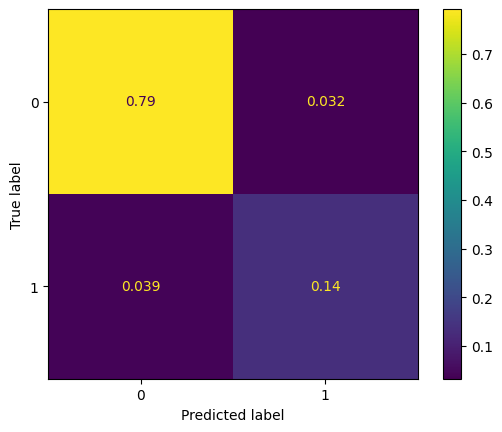

In [191]:
#Decision tree for label encoded data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X=X_full.drop(['Defaulted'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, X_full['Defaulted'], random_state=0)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print('F1 score for label encoded model is: {:.10f}'.format(f1_score(y_test, y_pred, average='weighted')))
cm=confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

F1 score for label encoded model is: 0.9280090271


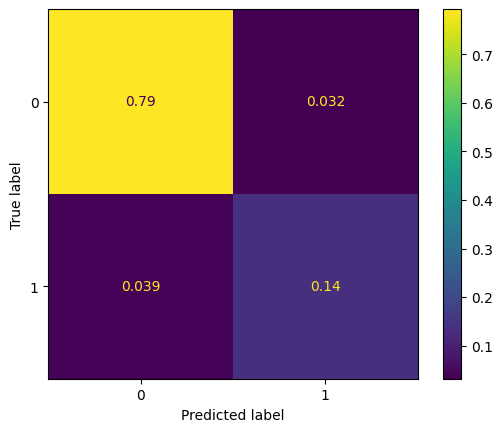

In [192]:
#Decision tree for target encoded data
traindata=train_TE.copy()
testdata=test_TE.copy()
y_train=traindata['Defaulted']
X_train=traindata.drop(['Defaulted'],axis=1)
y_test=testdata['Defaulted']
X_test=testdata.drop(['Defaulted'], axis=1)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print('F1 score for label encoded model is: {:.10f}'.format(f1_score(y_test, y_pred, average='weighted')))
cm=confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

F1 score for label encoded model is: 0.9246768177


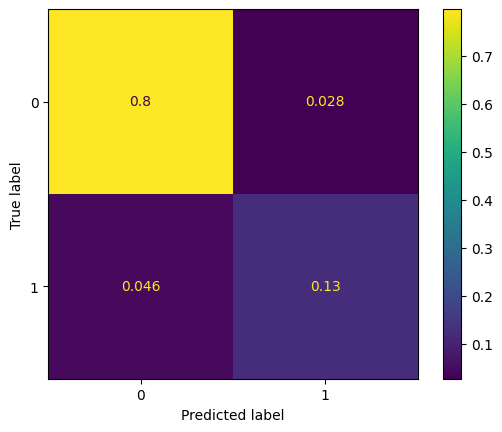

In [193]:
#Decision tree for WOE encoded data
traindata=train_WOE.copy()
testdata=test_WOE.copy()
y_train=traindata['Defaulted']
X_train=traindata.drop(['Defaulted'],axis=1)
y_test=testdata['Defaulted']
X_test=testdata.drop(['Defaulted'], axis=1)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print('F1 score for label encoded model is: {:.10f}'.format(f1_score(y_test, y_pred, average='weighted')))
cm=confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

To answer this question use categorical columns encoded with Target encoder.

You will split Train dataset using 80/20 split to Train/Validation. 
Use new Train dataset to fit the model.
Use Validation dataset to evaluate the model and identify best model.

Tune Decision Tree model to identify hyper-parameters that lead to best performance as measured by F1 score ("weighted") on the Validation dataset.

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

From the above 45 models, identify best model as measured by F1 score on Validation dataset.  
For the Best model:
- Report set of hyper parameters used to train the model.  
- Report F1 and confusion matrix on **Validation** dataset.  
- Report F1 and confusion matrix on **Test** dataset.


In [216]:
train=train_TE.copy() #taking a copy of train dataset which is target encoded
X=train.drop(['Defaulted'],axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, train['Defaulted'],test_size=0.2,random_state=10)
max_depth = [5,10,12,15,20]
min_samples_split = [25, 50, 75]
min_impurity_decrease = [0.0, 0.02, 0.05]
result=pd.DataFrame(index=[x for x in range(45)],columns=['max_depth','min_samples_split','min_impurity_decrease','F1 Score'])
count=0
for i in max_depth:
    for j in min_samples_split:
        for k in min_impurity_decrease:
            dtc = DecisionTreeClassifier(criterion="entropy",max_depth=i, min_samples_split=j, min_impurity_decrease=k, random_state=123)
            dtc.fit(X_train, y_train)
            y_pred=dtc.predict(X_test)
            #print('F1 score of model with maxdepth :{}, min_samples_split:{},min_impurity_decrease:{} is :{:.4f}'.format(i,j,k,f1_score(y_test, y_pred, average='weighted')))
            result.loc[count]= [i,j,k,'{:.4f}'.format(f1_score(y_test, y_pred, average='weighted'))]
            count=count+1
result

,max_depth,min_samples_split,min_impurity_decrease,F1 Score
0,5,25,0.0,0.8984
1,5,25,0.02,0.8533
2,5,25,0.05,0.8533
3,5,50,0.0,0.8984
4,5,50,0.02,0.8533
5,5,50,0.05,0.8533
6,5,75,0.0,0.8984
7,5,75,0.02,0.8533
8,5,75,0.05,0.8533
9,10,25,0.0,0.9295


In [217]:
max(result['F1 Score'])

'0.9369'

F1 score of model with maxdepth :15, min_samples_split:75,min_impurity_decrease:0.0 is :0.9369 is the highest
These were the hyperparameters used in the best model

F1 score for validation data in best model is: 0.9368708639


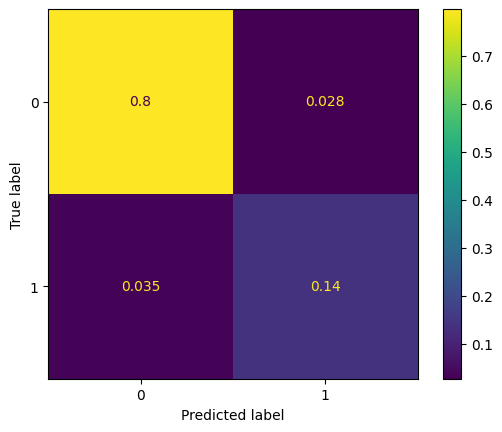

In [219]:
#Best model on validation data set
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_split=75, min_impurity_decrease=0.0, random_state=123)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print('F1 score for validation data in best model is: {:.10f}'.format(f1_score(y_test, y_pred, average='weighted')))
cm=confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

F1 score for validation data in best model is: 0.9474753718


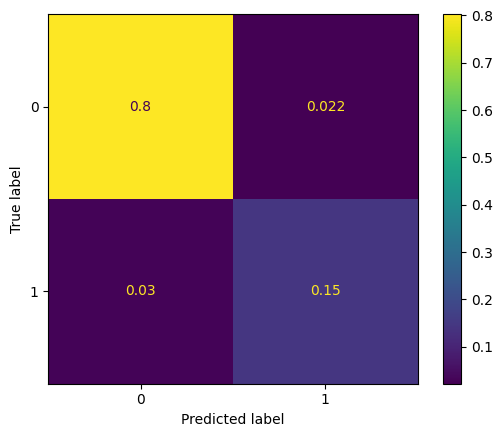

In [221]:
#Best model on training data set
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_split=75, min_impurity_decrease=0.0, random_state=123)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_train)
print('F1 score for validation data in best model is: {:.10f}'.format(f1_score(y_train, y_pred, average='weighted')))
cm=confusion_matrix(y_train, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Retrain the model with best params you have identified in previous section on full Training dataset.
Evaluate model performance on Test dataset.

F1 score for validation data in best model is: 0.9349097296


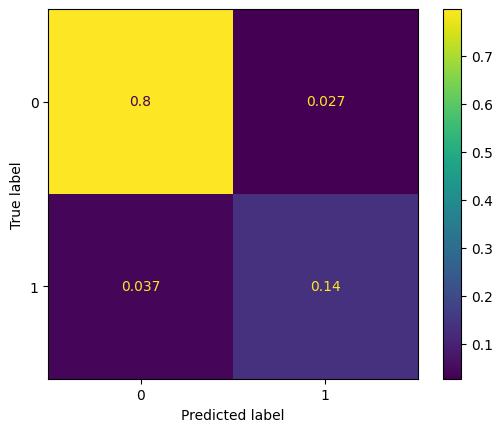

In [225]:
# Best model parameters are maxdepth :15, min_samples_split:75,min_impurity_decrease:0.0
#Training it on full data set
train=train_TE.copy()
X_train=train.drop(['Defaulted'],axis=1)
y_train=train['Defaulted']
test=test_TE.copy()
X_test=test.drop(['Defaulted'],axis=1)
y_test=test['Defaulted']
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_split=75, min_impurity_decrease=0.0, random_state=123)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print('F1 score for validation data in best model is: {:.10f}'.format(f1_score(y_test, y_pred, average='weighted')))
cm=confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Producing visualization of the best model feature importance's.
Calculate feature importance using permutation method.

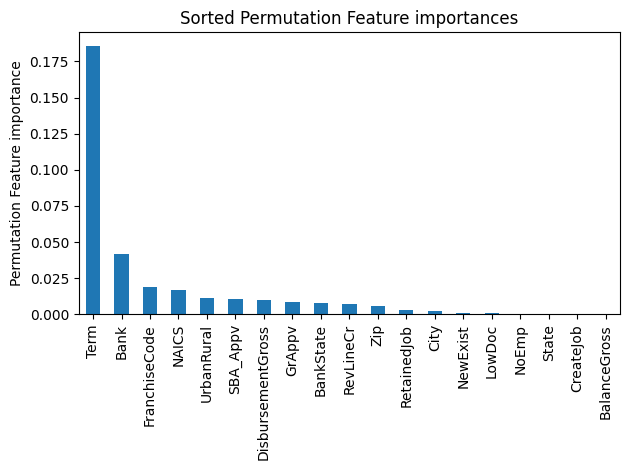

In [229]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    dtc, X_test, y_test, n_repeats=100, random_state=42, n_jobs=4)
tree_importances = pd.Series(result.importances_mean, index=X_test.columns)
feature_names = X_test.columns
tree_importances = tree_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Permutation Feature importances")
ax.set_ylabel("Permutation Feature importance")
fig.tight_layout()